In [11]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import Model, optimizers

In [ ]:
## Prepare Dataset
## a.Config
batch_size = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150
path = './dataset/dataset/train'
validation_dir = './dataset/dataset/test'

# b.Init Image Data generator
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# c.Load img using image data generator
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

In [14]:
## Prepare Dataset
# a. Config
dir_path = './dataset'
batch_size = 32
img_width = 200
img_height = 200

# b. init image data generator
_train_IDG = ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.1,
                                rescale=1./255,
                                shear_range = 0.1,
                                zoom_range = 0.1,
                                width_shift_range = 0.1,
                                height_shift_range = 0.1,)
_test_IDG = ImageDataGenerator(rescale=1/255,
                               validation_split=0.1)
# c. Apply
train_data_gen = _train_IDG.flow_from_directory(dir_path,
                                                 target_size=(img_width,img_height),
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 subset='training')
test_data_gen = _test_IDG.flow_from_directory(dir_path,
                                              target_size=(img_width,img_height),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              subset='validation')

# Check
labels = (train_data_gen.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


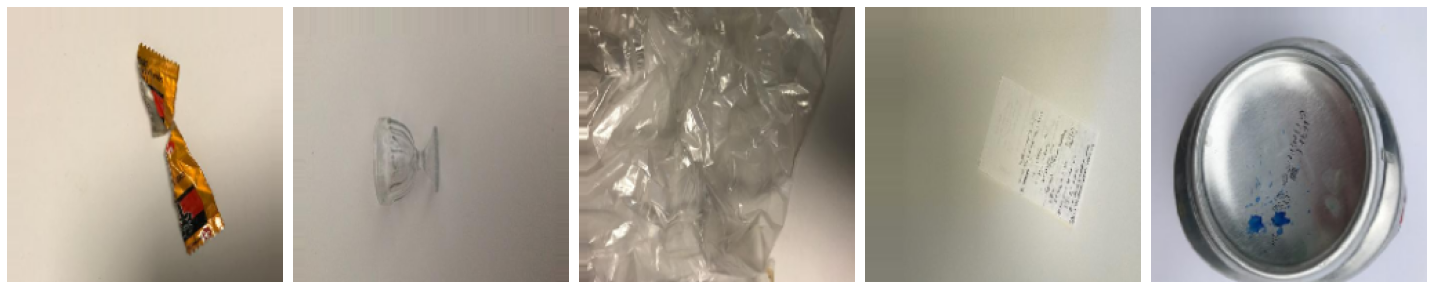

In [15]:
## Show Sample Image (additional)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])



In [17]:
## Base Model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',
           input_shape=(img_width, img_height ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(6, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 64)       

In [18]:
# Train Model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [21]:
epochs = 50

# Train process
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=len(test_data_gen),
)

Epoch 1/50
72/72 [==============================] - 28s 386ms/step - loss: 1.3784 - accuracy: 0.3581 - val_loss: 1.5381 - val_accuracy: 0.3307

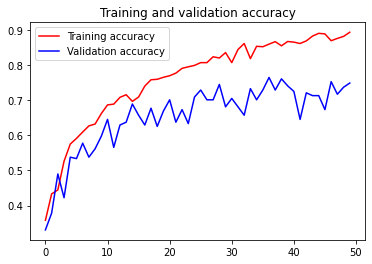

<Figure size 432x288 with 0 Axes>

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


In [23]:
model.save('baseline_kelvin.h5')